#  Load Required Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

# Load & Read the Data from .CSV file

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Shape of Data Set
df.shape

(7043, 21)

In [4]:
# Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Clean and Transform Data

In [5]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Replace No internet service and No phone service to No for following columns

replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
                'StreamingMovies', 'MultipleLines']
for i in replace_cols:
    df[i] = df[i].replace({'No internet service' : 'No'})
    df[i] = df[i].replace({'No phone service' : 'No'})
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
# Split the data (Churn, Not Churn)

df_churn     =   df[df['Churn'] == 'Yes']
df_not_churn =   df[df['Churn'] == 'No']

In [8]:
# check for null values in TotalCharges for both Churn and not Churn

churn_sum      =   df_churn['TotalCharges'].isnull().sum()
not_churn_sum  =   df_not_churn['TotalCharges'].isnull().sum()
print("Total Null values (Churn)",churn_sum)
print("Total Null values (Not Churn)",not_churn_sum)


Total Null values (Churn) 0
Total Null values (Not Churn) 11


In [9]:
# Drop null values and check null values

df_not_Churn = df_not_churn.dropna(axis = 0, how ='any') 
not_churn_sum_after_drop  =   df_not_Churn['TotalCharges'].isnull().sum()
print("Total Null values after drop (Not Churn)",not_churn_sum_after_drop)

Total Null values after drop (Not Churn) 0


<b>Data wrangling Analysis: </b>

    1. Fortunately this is not a 'messy' data set
    2. The dataset has no missing values or null values
    3. We have more than 7000 rows and 21 attributes (columns)
    4. Some data that should be categorical are saved as number. Let's fix this
    5. If there are any missing values then 'df.fillna' can be used to fill the missing data
    6. Convert Total Charge to numeric
    7. there are some features that contains ambiguous informations, for example, OnlineSecurity contains 3 
        differents labels, but the correct labels are YES or NO


# Data Visualization

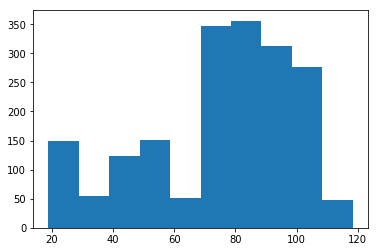

In [10]:
# Histogram (Total Charges for Churn Customers) 

plt.hist(df_churn['MonthlyCharges'],bins= 10)
plt.show()

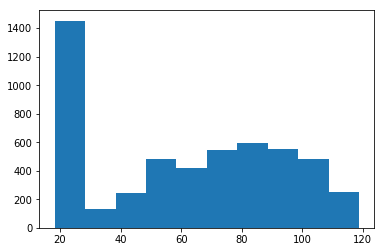

In [11]:
# Histogram (Total Charges for Not Churn Customers) 

plt.hist(df_not_Churn['MonthlyCharges'],bins= 10)
plt.show()

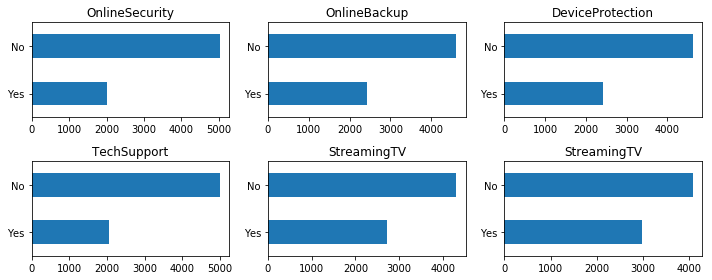

In [12]:
# Bar charts for all additional services based on count (Sub-Plot)

f, axes = plt.subplots(2, 3, sharey=False, sharex=False, figsize=(10,4))
df['OnlineSecurity'].value_counts(ascending=True).plot.barh(title='OnlineSecurity', ax=axes[0,0])
df['OnlineBackup'].value_counts(ascending=True).plot.barh(title='OnlineBackup', ax=axes[0,1])
df['DeviceProtection'].value_counts(ascending=True).plot.barh(title='DeviceProtection', ax=axes[0,2])
df['TechSupport'].value_counts(ascending=True).plot.barh(title='TechSupport', ax=axes[1,0])
df['StreamingMovies'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,1])
df['MultipleLines'].value_counts(ascending=True).plot.barh(title='StreamingTV', ax=axes[1,2])
plt.tight_layout()

In [13]:
# Function to generate barplots for different features

def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

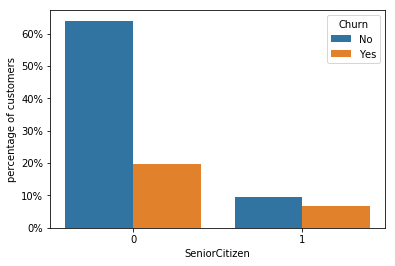

In [14]:
# Churn Pecentage for senior citizens 

barplot_percentages("SeniorCitizen")

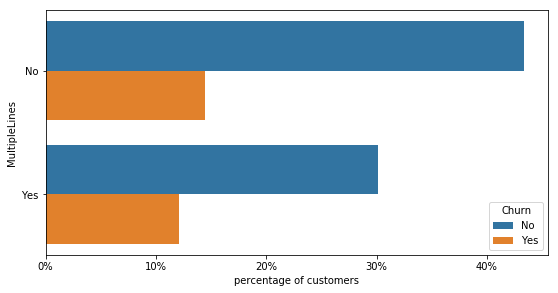

In [15]:
# Churn percentage for customers who has multiple lines

plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

<b> Observations: </b>
    
        * Customers with multiple lines have a slightly higher churn rate

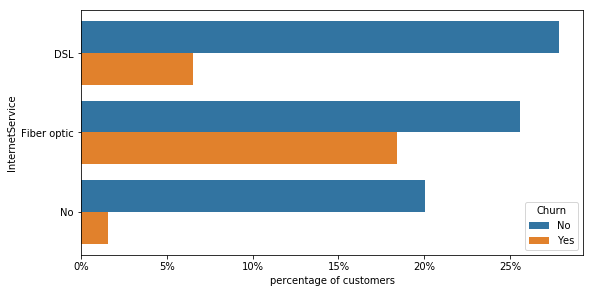

In [16]:
# Churn percentage for customers who has Internet services

plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

<b> Observation: </b>
    
    * Customers without internet have a very low churn rate
    * Customers with fiber are more probable to churn than those with DSL connection

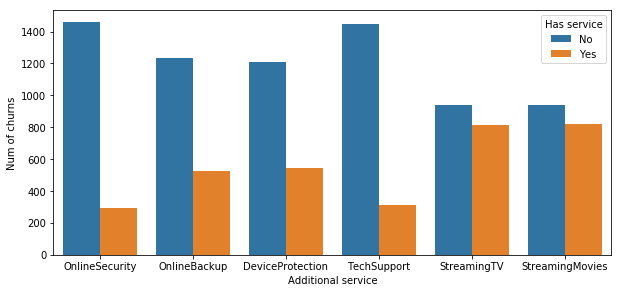

In [18]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

<b> Observations </b>

    * Customers with online Security and tech support has a very low churn rate
    * Customers with Streaming services are more likely to churn

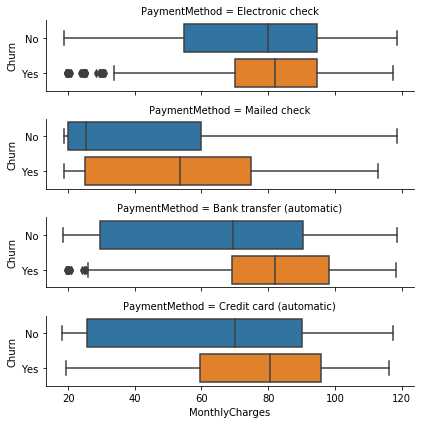

In [19]:

ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')





Customers with automatic payments has high churn rate

Text(0.5, 1.0, '# of Customers by Contract Type')

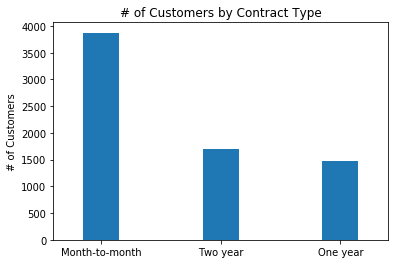

In [20]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

<b> Observations: </b>
    
   * As we can see from this graph most of the customers are in the month to month contract. 
   * While there are equal number of customers in the 1 year and 2 year contracts.

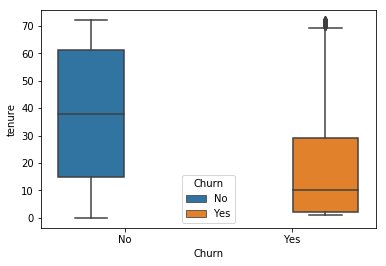

In [21]:
sns.boxplot(x = "Churn", y = "tenure",data = df, hue = "Churn")

<b> Observations: </b>
    * Churn rate is high for the customers who has less tenure/contract with Telco company .

# EDA - Statistical Analysis 
 

In [22]:
# Statistical Summary of the Dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

df["gender"] = df["gender"].map(gender_map)

def map_features(features):
    for feature in features:
        df[feature] = df[feature].map(yes_no_map)

In [24]:
list_features = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
map_features(list_features)

In [25]:
# Converting categorical data into numbers with Pandas and Scikit-learn
dataset = pd.get_dummies(df)

In [26]:
# Overview of our final dataset
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


In [27]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.000,1.0000,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.000,1.0000,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.000,1.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.000,1.0000,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.000,1.0000,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.000,1.0000,1.00


In [28]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

for i in range(len(dataset.columns)):
    chi2, p = chisquare(dataset[dataset.columns[i]])
    result = result.append([pd.Series([dataset.columns[i], chi2], index = result.columns)], ignore_index=True)

result = result.sort_values(by="Chi2Weights", ascending=False)
result

,Features,Chi2Weights
4,tenure,131212.823562
7,MonthlyCharges,98451.778472
2691,customerID_3806-DXQOM,7042.000000
3371,customerID_4795-UXVCJ,7042.000000
566,customerID_0820-FNRNX,7042.000000
1776,customerID_2581-VKIRT,7042.000000
5124,customerID_7190-XHTWJ,7042.000000
6109,customerID_8637-XJIVR,7042.000000
2251,customerID_3199-XGZCY,7042.000000
1182,customerID_1725-MIMXW,7042.000000


# Machine Learning Models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
#from sklearn.metrics import f1_score
#from sklearn.metrics import precision_score,recall_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
import seaborn as sns#visualization
#import plotly.offline as py#visualization
#py.init_notebook_mode(connected=True)#visualization
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
#import plotly.graph_objs as go#visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [31]:
telecom_cust = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [32]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.drop(columns=['customerID'])
#telecom_cust.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [33]:
# Split trianing and test Data:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Logistic Regression

In [34]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


logit.fit(X_train,y_train)
predict = logit.predict(X_test)
Proba  = logit.predict_proba(X_test)

print("Algorithm :",  logit)
print ("\n Classification report : \n",classification_report(y_test,predict))
print ("Accuracy   Score : ",accuracy_score(y_test,predict))
model_roc_auc = roc_auc_score(y_test,predict) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,Proba[:,1])

Algorithm : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.54      0.59       464

   micro avg       0.80      0.80      0.80      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758

Accuracy   Score :  0.8020477815699659
Area under curve :  0.7183103048553003 



AxesSubplot(0.125,0.125;0.775x0.755)


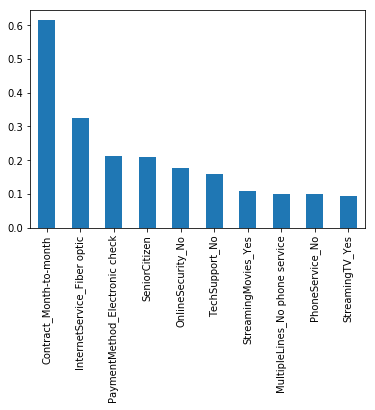

In [35]:
weights = pd.Series(logit.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

# Random Forest Classifier

In [36]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Algorithm :",  clf)
print ("\n Classification report : \n",classification_report(y_test,y_pred))
print ("Accuracy   Score : ",accuracy_score(y_test,y_pred))
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,Proba[:,1])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Algorithm : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1294
           1       0.60      0.44      0.51       464

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758

Accuracy   Score :  0.7758816837315131
Area under curve :  0.6673589644513137 

Accuracy: 0.7758816837315131


# Gradient Boosting Regressor

In [37]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) 

mse = mean_squared_error(y_test,y_pred)
print("MSE: %.4f" % mse)

MSE: 0.1323


Text(0, 0.5, 'Deviance')

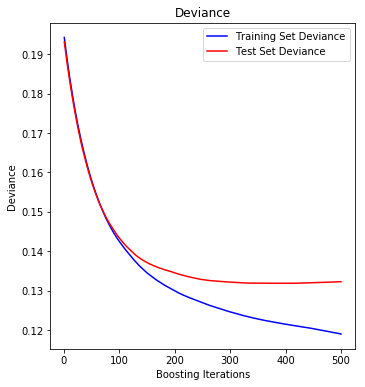

In [38]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Support Vector Machine (SVM)

In [39]:
#X_train, X_test, y_train, y_test
#from sklearn.svm import SVC
from sklearn import svm
model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, preds)
print("Algorithm :",  model)
print("accuracy score", accuracy_score)

NameError: name 'SVC' is not defined